# Task2

### Входные данные:
Глубина ямы: U0;
Ширина ямы: a;
ksi: -E/U0;

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def NumericalDerivative(Function : callable, x : float, eps : float = 1e-10):
    return (Function(x+eps)-Function(x))/eps

def NumericalDerivative2(Function : callable, x : float, eps : float = 1e-10):
    return (Function(x+eps)-Function(x-eps))/(2*eps)

In [3]:
def FindRootDichotomy(Function : callable, a : float, b : float, eps : float = 1e-10, iter_limit : int = 10000):
    mid_value : float = (a+b)/2
    iter_count : int = 0
    while (abs(Function(mid_value)) > eps):
        if (iter_count > iter_limit):
            raise Exception('No root was found')
            
        if (a > b):
            raise Exception('Wrong interval!')      
            
        mid_value = (a + b)/2
        check_derivative = Function(a)*Function((a + b)/2)
        if (check_derivative == 0): # we found the root, stop now
            break
        elif (check_derivative < 0):
            b = mid_value
        else:
            a = mid_value
        iter_count  = iter_count + 1
    print(f"Root found in: {iter_count}")
    return mid_value

In [4]:
def FindRootSimpleIter(Function : callable, x0 : float, eps : float = 1e-10, iter_limit : int = 1000):
    if (NumericalDerivative(Function, x0)>1):
        raise Exception("Derivative is bigger than 1")
    iter_count : int = 0
    x = x0
    while (abs(Function(x)) > eps):
        if (iter_count > iter_limit):
            raise Exception('No root was found')
        x = x - Function(x)
        iter_count  = iter_count + 1
    print(f"Root found in: {iter_count}")
    return x

In [5]:
def FindRootNewton(Function : callable, x0 : float, eps : float = 1e-10, iter_limit : int = 1000):
    iter_count : int = 0
    x = x0
    while (abs(Function(x)) > eps):
        if (iter_count > iter_limit):
            raise Exception('No root was found')
        x = x - Function(x)/NumericalDerivative(Function, x, eps)
        iter_count  = iter_count + 1
    print(f"Root found in: {iter_count}")
    return x

Root found in: 30
Dichotomy: 
	x: 1.4142135623842478
	f(x): 3.154454475406965e-12

Root found in: 58
SimpleIterations: 
	x: 1.4142135627205854
	f(x): 9.828511338128011e-11

Root found in: 10
Newton: 
	x: 1.4142135623742476
	f(x): 3.2596148002994596e-13



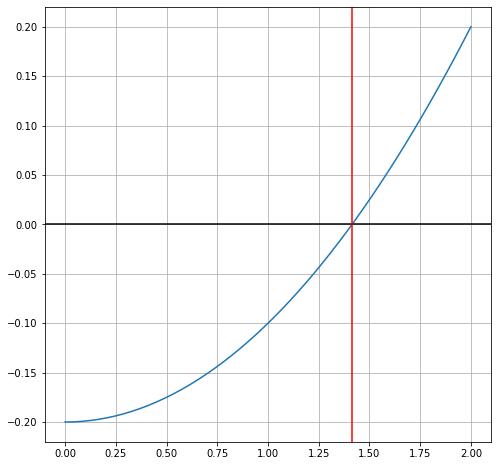

In [6]:
a = 0
b =  2

def Function(x : float):
    return (x**2 - 2)*0.1

X = np.linspace(a,b)
Y = Function(X)
root1  = FindRootDichotomy(Function,a,b)
print(f"Dichotomy: \n\tx: {root1}\n\tf(x): {Function(root1)}\n")

root2 = FindRootSimpleIter(Function, 1.5)
print(f"SimpleIterations: \n\tx: {root2}\n\tf(x): {Function(root2)}\n")

root3 = FindRootNewton(Function, 100)
print(f"Newton: \n\tx: {root3}\n\tf(x): {Function(root3)}\n")

plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.axhline(0, color = 'black')
plt.axvline(root1, color = 'red')
plt.grid()
plt.show()

In [7]:
# Schrodingers equation






X = np.linspace(a,b, 1000)

@widgets.interact(show_F1 = True, show_F2 = True, show_S = True, U0 =(0,10.0), A = (0,10.0))
def draw(show_F1 = True, show_F2 = True, show_S = True, U0 = 1.0, A = 1.0):
    
    m = 1
    A = 1
    U0 = 1
    h = 1
    const = 2*m*(A**2)*U0/(h**2)
    a = 1e-10
    b = (np.pi/2/const)-1
    print(f"b: {b}")
#     b = np.pi/2
    
    def f1(x : float):
        return 1.0/np.tan(np.sqrt(const * (1-x)))
#         return 1.0/np.tan(x)

    def f2(x : float):
        return np.sqrt(1/x-1)

    def SchrodingersSolution(x : float):
        return f1(x)-f2(x)

    Y = SchrodingersSolution(X)
    F1 = f1(X)
    F2 = f2(X)
    
    root1  = FindRootDichotomy(SchrodingersSolution,a,b)
    print(f"Dichotomy: \n\tx: {root1}\n\tf(x): {SchrodingersSolution(root1)}")
    print(f"Energy ground state: {-root1*U0}\n")
    
#     root2 = FindRootSimpleIter(SchrodingersSolution, 0.5)
#     print(f"SimpleIterations: \n\tx: {root2}\n\tf(x): {SchrodingersSolution(root2)}")
#     print(f"Energy ground state: {-root2*U0}\n")

    root3 = FindRootNewton(SchrodingersSolution, 0.1)
    print(f"Newton: \n\tx: {root3}\n\tf(x): {SchrodingersSolution(root3)}")
    print(f"Energy ground state: {-root3*U0}\n")

    plt.figure(figsize=(8,8))
    plt.xlim([-np.pi, np.pi])
    plt.ylim([-3, 3])

    plt.axhline(0, color = 'black')
    plt.axvline(0, color = 'black')
    plt.axvline(root3, color = 'gray')
    
    
    if(show_F1):
        plt.plot(X,F1, color = 'red')
    if(show_F2):
        plt.plot(X,F2, color = 'blue')    
    if(show_S):
        plt.plot(X,Y, color = 'orange')
    plt.grid()
    plt.show()

interactive(children=(Checkbox(value=True, description='show_F1'), Checkbox(value=True, description='show_F2')…